In [4]:
library(targets)
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   0.3.4
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


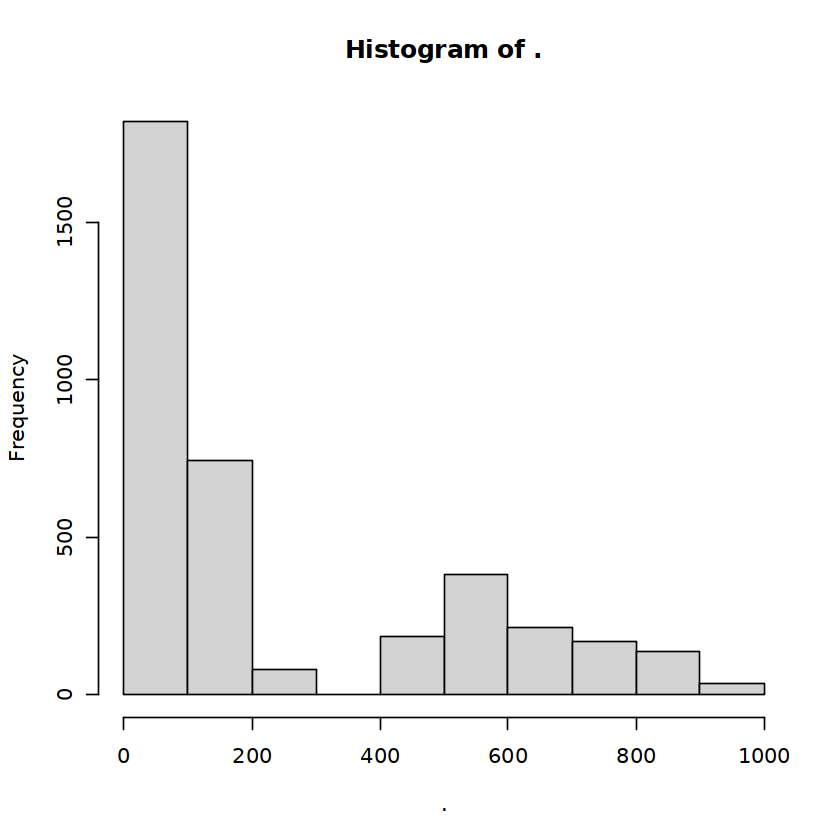

In [74]:
tar_meta() %>%
pull(seconds) %>% hist

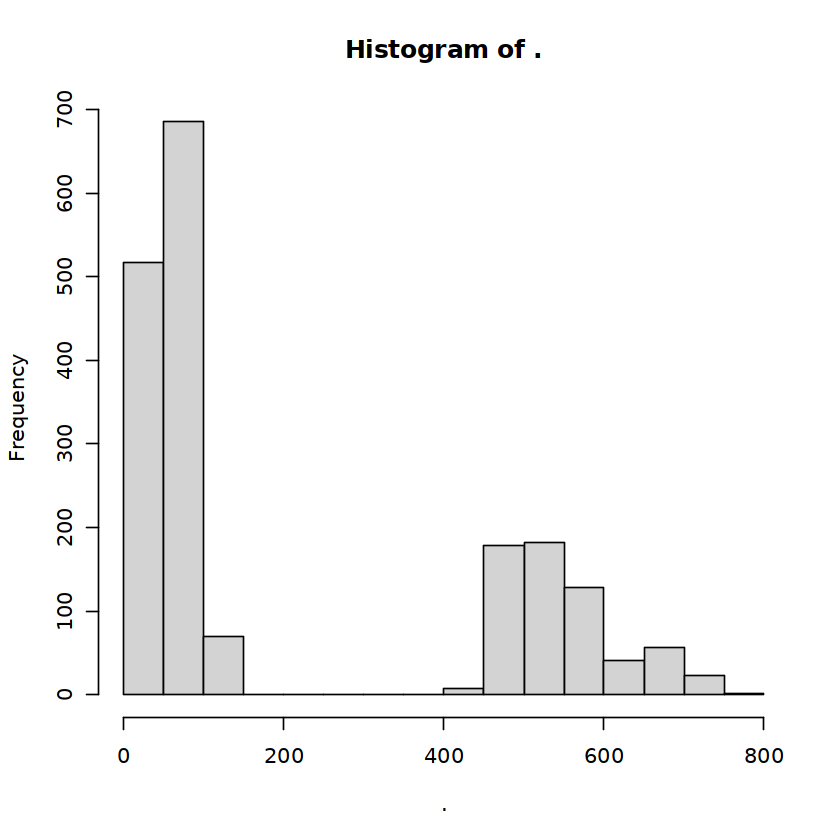

In [75]:
tar_meta() %>%
filter(!is.na(error)) %>%
pull(seconds) %>% hist

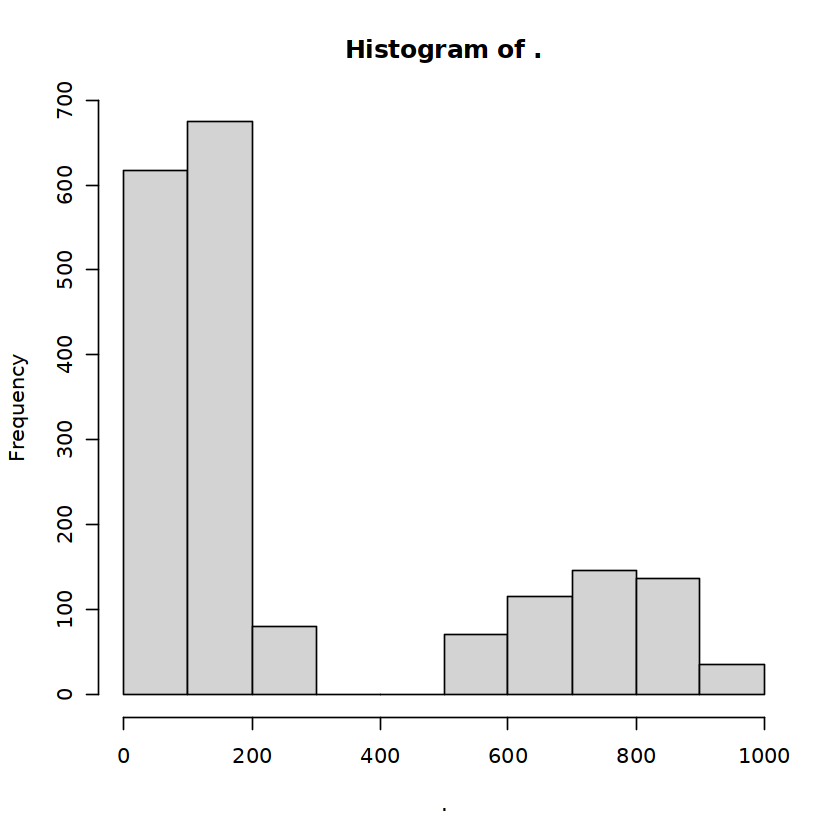

In [76]:
tar_meta() %>%
filter(is.na(error)) %>%
pull(seconds) %>% hist

In [51]:
tar_meta() %>% dim

[1] 830  18

In [52]:
tar_meta() %>% 
filter(is.na(error)) %>% dim

[1] 483  18

In [25]:
tar_meta() %>% select(time) %>% filter(time > as.POSIXct("2024-01-14")) %>% head %>% print

# A tibble: 6 × 1
  time               
  <dttm>             
1 2024-01-14 13:23:28
2 2024-01-14 13:24:39
3 2024-01-14 13:25:08
4 2024-01-14 13:25:10
5 2024-01-14 13:25:32
6 2024-01-14 13:25:32


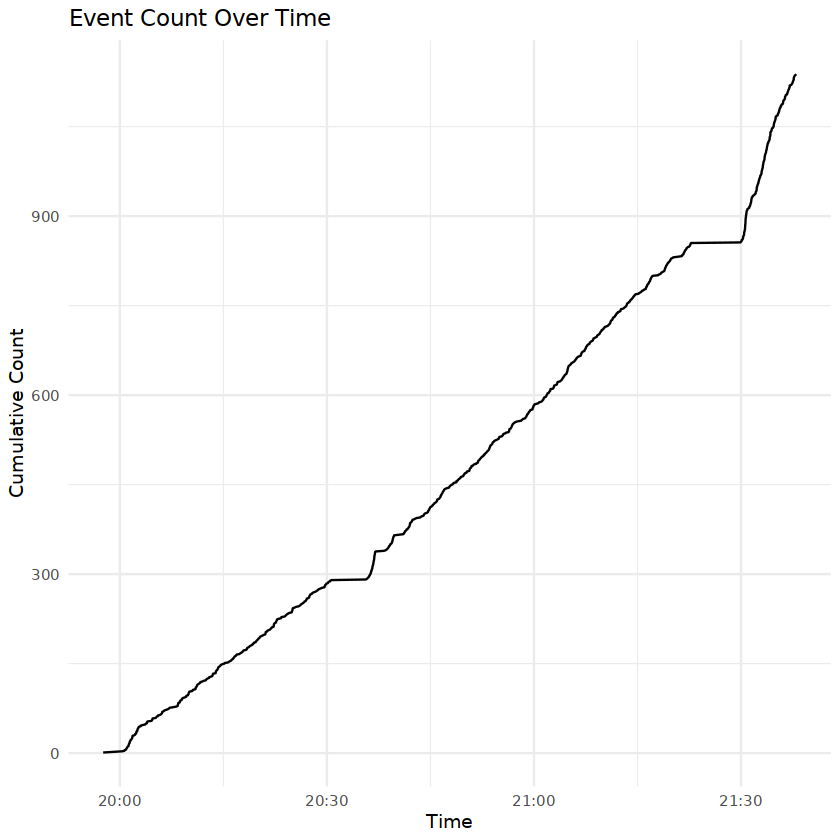

In [106]:
# Add a count column
data <- tar_meta() %>%
filter(time > as.POSIXct("2024-01-14 15:00:00")) %>%
  arrange(time) %>%
  mutate(count = row_number())

# Plotting
ggplot(data, aes(x = time, y = count)) +
  geom_line() +
  labs(title = "Event Count Over Time",
       x = "Time",
       y = "Cumulative Count") +
  theme_minimal()

In [103]:
library(lubridate)

filtered_data <- tar_meta() %>%
  filter(time >= as.POSIXct("2024-01-14 20:45:00") & time <= as.POSIXct("2024-01-14 20:58:00")) %>%
  arrange(time)

# Assuming linear behavior between the first and last points in this interval
start_point <- first(filtered_data)
end_point <- last(filtered_data)

# Calculate the slope
# Delta y
delta_y <- filtered_data %>% count

# Delta x in hours
delta_x <- as.numeric(difftime(end_point$time, start_point$time, units = "hours"))

# Slope
slope <- delta_y / delta_x

slope

n
<dbl>
691.9833


In [83]:
1600/ 538

[1] 2.973978